# The Physics of Sound, Part II

[return to main page](index.ipynb)

## Preparations

For this exercise we need the [Sound Field Synthesis Toolbox](http://sfstoolbox.org);

In [1]:
import sfs

And some other stuff:

In [2]:
# remove "inline" to get a separate plotting window:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.umath_tests import inner1d

A grid for computation and plotting:

In [3]:
grid = sfs.util.xyz_grid([-2, 2], [-2, 2], 0, spacing=0.01)

## The Green's Function

In the last exercise, we got to know the inhomogeneous Helmholtz equation

$$\Delta P(\mathbf x, \omega) + \left(\frac{\omega}{c}\right)^2 P(\mathbf x, \omega) = -Q(\mathbf x, \omega)$$

as the temporal Fourier Transform of the inhomogeneous wave equation.

*Exercise*: As a little repetition, what is denoted by $P(\mathbf x, \omega)$ and $Q(\mathbf x, \omega)$, again?

<font color='blue'>
*
$P(\mathbf x, \omega)$: Temporal spectrum of the sound pressure  
$Q(\mathbf x, \omega)$: Temporal spectrum of the source density
*
</font>

We got to know the some solutions of the inhomogeneous Helmholtz equation for specific $
Q(\mathbf x, \omega)$, like e.g. the plane wave, the point source, or the line source. The Green’s function $G(\mathbf x|\mathbf x_0 , \omega)$ is a versatile tool to express the solution of inhomogeneous Helmholtz Equation for any given density $Q(\mathbf x, \omega)$. It is the solution of the inhomogeneous Helmholtz Equation for a spatio(-temporal) Dirac pulse at $\mathbf x_0$ as inhomogeneity fulfilling potential initial and boundary conditions. Its density spectrum is hence defined $Q_{G}(\mathbf x | \mathbf x_0, \omega) = \delta(\mathbf x - \mathbf x_0) = \delta(x-x_0)\delta(y-y_0)\delta(z-z_0)$. The Green's Function fulfils the inhomogeneous Helmholtz Equation

$$\Delta G(\mathbf x|\mathbf x_0 , \omega) + \left(\frac{\omega}{c}\right)^2 G(\mathbf x|\mathbf x_0 , \omega) = - \delta(\mathbf x - \mathbf x_0)$$

### Some Properties of the Green's Function

#### Reciprocity Principle

In acoustics, generally the reciprocity principle holds.

*Exercise*: What does the reciprocity principle tell us?

<font color='blue'>
*One can exchange observer ($\mathbf x$) and source position ($\mathbf x_0$). $G(\mathbf x|\mathbf x_0 , \omega) = G(\mathbf x_0| \mathbf x, \omega)$*
</font>

#### Translation Invariance

Under free field propogation (no boundaries) the Green's Function $G(\mathbf x|\mathbf x_0 , \omega)$ is sometimes called the free-field Green's function $G_0(\mathbf x|\mathbf x_0 , \omega)$. Here, the translation invariance $G_0(\mathbf x|\mathbf x_0 , \omega) = G_0(\mathbf x - \mathbf x_0 , \omega)$  holds. For three- or two-dimensional scenarios the free-field Green's function is a point source or line source, respectively.

*Exercise: What is the physical meaning of the translation invariance?*

<font color='blue'>
*Only the relative positions between observer and source matters. Shifting both quanties about the same amount does not change the acoustic conditions.*
</font>

*Exercise: Why is does an ordinary room, e.g. a seminar room, not fulfil the translation invariance*?

<font color='blue'>
*Walls and Obstacle imply boundary conditions. If e.g. a sound source and observer move closer to wall while maintaining their relative positions, then the reflection from that wall becomes stronger*
</font>

### Expressing a Sound Field by the Green's Function

We will now see how to use the Green's Function to express the solution $P(\mathbf x, \omega)$ for arbitrary $Q(\mathbf x, \omega)$.

*Exercise: Calculate the following Integral using the properties of the Dirac impulse.*

$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} 
Q(\mathbf x_0, \omega) \delta(\mathbf x - \mathbf x_0) 
\mathrm d x_0 \mathrm d y_0 \mathrm d z_0
$$

<font color='blue'>
*
Using the property of Dirac impulse  

$$\int_{-\infty}^{\infty} f(x_0) \delta(x_0 - x) \mathrm d x_0 = f(x)$$

and repeating this for the other dimenstions yields  

$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} 
Q(\mathbf x_0, \omega) \delta(\mathbf x - \mathbf x_0) 
\mathrm d x_0 \mathrm d y_0 \mathrm d z_0 = Q(\mathbf x, \omega)
$$
*
</font>

Now we know, how the density $Q(\mathbf x, \omega)$ of the sound field $P(\mathbf x, \omega)$ and the density $\delta(\mathbf x - \mathbf x_0)$ of the Green's function $G(\mathbf x|\mathbf x_0 , \omega)$ are related.

*Exercise: Keeping the linearity of the Helmholtz Equation in mind, how are $P(\mathbf x, \omega)$ and $G(\mathbf x|\mathbf x_0 , \omega)$ related? What is the physical meaning of this result?* 

<font color='blue'>
*
$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} 
Q(\mathbf x_0, \omega) G(\mathbf x|\mathbf x_0 , \omega)
\mathrm d x_0 \mathrm d y_0 \mathrm d z_0 = P(\mathbf x, \omega)
$$

A sound field with the density $Q(\mathbf x, \omega)$ can be expressed as the superposition of Green's functions, while the Green's function at $Q(\mathbf x_0)$ is weighted by $Q(\mathbf x_0, \omega)$.
*
</font>

## The Helmholtz Integral Equation

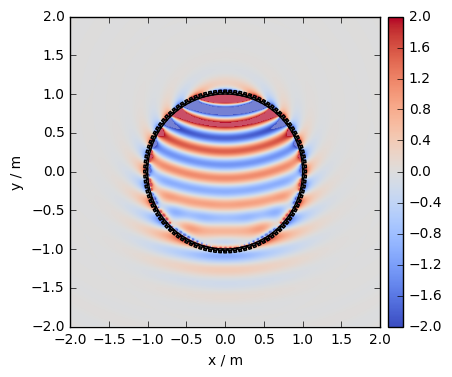

In [4]:
xs = 0,2,0  # position (metre)
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

x0, n0, a0 = sfs.array.circular(100, 1)  # secondary source on the circular boundary
x0_grid = np.array([x0[:,0],x0[:,1],x0[:,2]])  # convert to grid

p = sfs.mono.source.point(omega, xs, None, x0_grid)  # sound pressure at boundary 
v = sfs.mono.source.point_velocity(omega, xs, None, x0_grid)*(-1j)*sfs.defs.rho0*omega # pressure gradient at boundary
vx, vy, vz = sfs.util.as_xyz_components(v)
v = np.array([vx,vy,vz]).T

# directional gradient ("pressure gradient along n0")
v_n0 = np.einsum('ij,ij->i', v, n0)

# single layer potential (sound field generate by secondary monopole source)
p_single = sfs.mono.synthesized.generic(omega, x0, n0, -v_n0 * a0 , grid, source=sfs.mono.source.point)
# double layer potential (sound field generated by secondary dipole source)
p_double = sfs.mono.synthesized.generic(omega, x0, n0, p * a0 , grid, source=sfs.mono.source.point_dipole)

sfs.plot.soundfield(4*np.pi*(p_single + p_double), grid);
sfs.plot.loudspeaker_2d(x0,n0)

## Solutions

If you had problems solving some of the exercises, don't despair!
Have a look at the [example solutions](physics_of_sound_II-solutions.ipynb).

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>